In [1]:
# BENDING Moment- Concentrated Load Beam

all Dimension (m)/n   all loads in kN


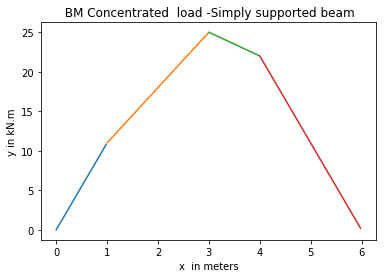

In [24]:
from numpy import *
import matplotlib.pyplot as plt
print("all Dimension (m)/n   all loads in kN")
l = 6;
p1 =4;
p2 = 10;
p3 = 8;

ra = 11
rb = 11
x1 = arange(0,1,.02)
x2 = arange(1,3,.02)
x3 = arange(3,4,.02)
x4 = arange(4,6,.02)
s1 = ra*x1;
s2 = ra*x2-4*(x2-1);
s3 = ra*x3 -4*(x3-1)-10*(x3-3);
s4 = ra*x4 -4*(x4-1)- 10*(x4-3)- 8*(x4-4);
plt.plot(x1,s1,x2,s2,x3,s3,x4,s4)
plt.xlabel("x  in meters")
plt.ylabel("y in kN.m")
plt.title(" BM Concentrated  load -Simply supported beam")
plt.show()


In [1]:
#  MULTIPLE  POINT LOADS ON A SIMPLY SUPPORTD BEAM

                     Left                 Right               
Reaction Forces      101.92307692307679   527.0769230769231   


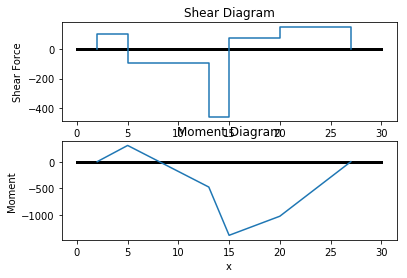

In [3]:
import numpy as np
import operator
import matplotlib.pyplot as plt


### Input Parameters
#  l         Beam width/length.
#  r_R       Positions of supports (requires 2).
#  F_c       List of concentrated forces.
#              Enter in as a tuple the location measured from the leftmost part of the
#              beam, and the force value as the second item in the tuple. Upward is positive.

l =   30
r_R = [ 2, 15 ]
F_c = [ (5,-200), (13,-357), (20,75), (27,-147) ]


## Calculate reaction forces
moment_prod, force_sum = [], 0
for i in range(len(F_c)):
    moment_prod.append(F_c[i][0]*F_c[i][1])
    force_sum = force_sum + F_c[i][1]
moment_sum = sum(moment_prod)

A = np.array([[1,1],[r_R[0],r_R[1]]])
b = np.array([[-force_sum],[-moment_sum]])

R = np.linalg.solve(A,b)
R1 = float(R[0])
R2 = float(R[1])


## Do calcs for the shear diagram
# First create a load array and sort by location from left to right
loads_all = [ (r_R[0],R1), (r_R[1],R2) ]
for each in F_c:
    loads_all.append(each)

pos_all, f_all = [], []
loads_srtd = sorted(loads_all, key = operator.itemgetter(0))
for each in loads_srtd:
    pos_all.append(each[0])
    f_all.append(each[1])


# Calculate shear point values
V_pts = []
for i in range(len(f_all)):
    V_pts.append(sum(f_all[:i]))


# Create a shear value function
V_x, V = [], []
for i in range(0,len(V_pts)):
    V.append(V_pts[i])
    V.append(V_pts[i])
    V_x.append(pos_all[i])
    V_x.append(pos_all[i])

V.remove(0)
V.append(0)


## Do calcs for the moment diagram
# Calculate moment points
M_pts, M = [], []
for i in range(len(V)):
    M_pts.append(np.trapz(V[i:i+2],V_x[i:i+2]))

while 0 in M_pts:
    M_pts.remove(0)

for i in range(len(M_pts)):
    M.append(sum(M_pts[:i]))


# Create a moment function
M.append(0)
M_x = pos_all


## Print results
print(''.ljust(20),'Left'.ljust(20),'Right'.ljust(20))
print('Reaction Forces'.ljust(20),str(R1).ljust(20),str(R2).ljust(20))


## Create plots
# Plot a shear diagram
fl = 0.05*l
plt.subplot(211)
plt.plot([0,l],[0,0],'k-',linewidth=3)
plt.plot(V_x,V)
plt.xlim(-fl,l+fl)
plt.title('Shear Diagram')
plt.xlabel('x')
plt.ylabel('Shear Force')

# Plot a moment diagram
plt.subplot(212)
plt.plot([0,l],[0,0],'k-',linewidth=3)
plt.plot(M_x,M)
plt.xlim(-fl,l+fl)
plt.title('Moment Diagram')
plt.xlabel('x')
plt.ylabel('Moment')
plt.show()

In [7]:
from sapy import displmethod
from sapy import element
from sapy import gmsh
from sapy import structure
from sapy import plotter


mesh_file = 'patch2'

bound = {0: [1, 1],
         2: [0, 1]}

nodal_load = {3: [10.0, -20.0]}


ele = element.Data()
for i in range(5):
    ele.E[i] = 100.
    ele.A[i] = 10.
    ele.TYPE[i] = 'Truss'
    
    
mesh = gmsh.Parse(mesh_file)
model = structure.Builder(mesh, ele, bound, nodal_load)


U, Q, V = displmethod.solver(mesh, model, ele, nodal_load)

    
    

ModuleNotFoundError: No module named 'sapy'

In [8]:
#  BEAM  BM D

In [11]:
Point(1) = {0, 0, 0};
Point(2) = {5, 0, 0};
Point(3) = {10, 0, 0}
Point(4) = {15, 0, 0}
Line(1) = {1, 2};
Line(2) = {2, 3};
Line(3) = {3, 4};


%matplotlib inline
from sapy import displmethod
from sapy import element
from sapy import gmsh
from sapy import structure
from sapy import plotter


mesh_file = 'patch4'

mesh = gmsh.Parse(mesh_file)

ele = element.Data()
for i in range(len(mesh.con)):
    ele.E[i] = 1000.
    ele.I[i] = 1000.
    ele.A[i] = 20.
    ele.TYPE[i] = '2dFrame'

bound = {0: [1, 1, 0], # 1 is restrained and 0 is free 
         2: [0, 1, 0]} # [dof1 dof2 dof3] translation in x and y, rotation

nodal_load = {}

ele.w[1] = [0, -5.0] # (x, y) coordinate of the distributed load
ele.w[2] = [0, -5.0]

model = structure.Builder(mesh, ele, bound, nodal_load)

U, Q, V = displmethod.solver(mesh, model, ele, nodal_load)



plotter.undeformed(model, axis='off')
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(10, 20)


plotter.deformed(model, U, V, ele, magf=800, axis='off')
plt.gcf().set_size_inches(10, 20)

SyntaxError: can't assign to function call (<ipython-input-11-9ac7b718a847>, line 1)